# HW2 Problem by Justin Bang




## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Underfit Model


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 1.5714 - acc: 0.3562 - val_loss: 0.9362 - val_acc: 0.7125
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 1.3038 - acc: 0.4388 - val_loss: 0.7883 - val_acc: 0.7722
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 1.2513 - acc: 0.4678 - val_loss: 0.7322 - val_acc: 0.7918
Epoch 4/10
60000/60000 [==============================] - 4s 75us/sample - loss: 1.2251 - acc: 0.4708 - val_loss: 0.6835 - val_acc: 0.7909
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 1.2117 - acc: 0.4846 - val_loss: 0.6615 - val_acc: 0.7948
Epoch 6/10
60000/60000 [==============================] - 5s 75us/sample - loss: 1.1946 - acc: 0.4908 - val_loss: 0.6527 - val_acc: 0.7957
Epoch 7/10
60000/60000

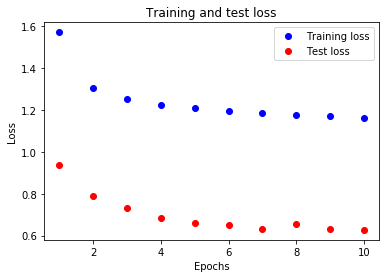

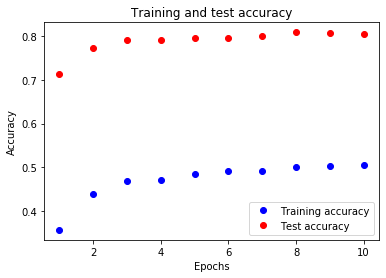

In [9]:
model_underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(28, activation=tf.nn.sigmoid),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])
model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
epochs = 10
history_underfit = model_underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

history_dict_underfit = history_underfit.history
loss_values_underfit = history_dict_underfit['loss']
test_loss_values_underfit = history_dict_underfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_underfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_underfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values_underfit = history_dict_underfit['acc']
test_acc_values_underfit = history_dict_underfit['val_acc']
plt.plot(epochs_range, acc_values_underfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_underfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit Model

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4978 - acc: 0.8249 - val_loss: 0.4088 - val_acc: 0.8568
Epoch 2/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3724 - acc: 0.8673 - val_loss: 0.3896 - val_acc: 0.8605
Epoch 3/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3344 - acc: 0.8792 - val_loss: 0.3709 - val_acc: 0.8662
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3102 - acc: 0.8862 - val_loss: 0.3608 - val_acc: 0.8701
Epoch 5/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2940 - acc: 0.8915 - val_loss: 0.3557 - val_acc: 0.8754
Epoch 6/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2797 - acc: 0.8967 - val_loss: 0.3815 - val_acc: 0.8701
Epoch 7/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2683 - acc: 0.9009 - val_loss: 0.

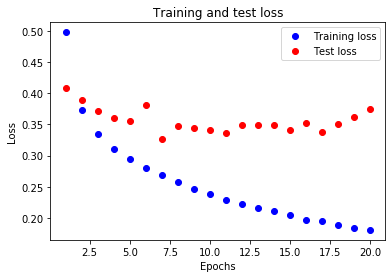

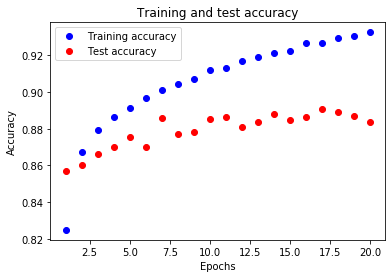

In [7]:
model_overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
epochs = 20
history_overfit = model_overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

history_dict_overfit = history_overfit.history
loss_values_overfit = history_dict_overfit['loss']
test_loss_values_overfit = history_dict_overfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_overfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_overfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values_overfit = history_dict_overfit['acc']
test_acc_values_overfit = history_dict_overfit['val_acc']
plt.plot(epochs_range, acc_values_overfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_overfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Goodfit Model

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.7399 - acc: 0.7332 - val_loss: 0.4736 - val_acc: 0.8283
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5395 - acc: 0.8070 - val_loss: 0.4257 - val_acc: 0.8446
Epoch 3/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4993 - acc: 0.8228 - val_loss: 0.4208 - val_acc: 0.8429
Epoch 4/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4734 - acc: 0.8308 - val_loss: 0.4027 - val_acc: 0.8528
Epoch 5/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4599 - acc: 0.8367 - val_loss: 0.3957 - val_acc: 0.8570
Epoch 6/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4520 - acc: 0.8395 - val_loss: 0.3899 - val_acc: 0.8594
Epoch 7/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4457 - acc: 0.8414 - val_loss: 0.

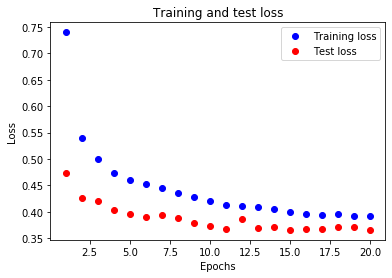

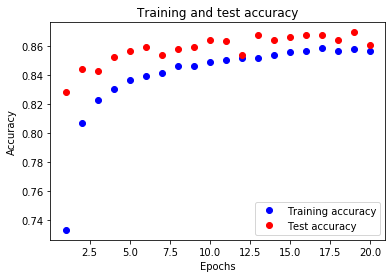

In [8]:
# Goodfit Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    #keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()